# <center><font color=maroon>CPE4903 Project: MNIST Handwritten Digit Classification</font> </center>

### In this mini-project, you will develop a CNN model for the handwritten digit classifier.
* Use the companion notebook file, `CPE_4903_MNIST_NN`, as a reference and follow the steps to train and test the model.
* <font color=red>Performance requirement: the accuracy on the test data needs to be better than 99% </font>
* You will save the parameters of the model at the end, which will be deployed on Raspberry Pi.

![mnist_2layers_arch.png](attachment:mnist_2layers_arch.png)

### Load tool modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
# from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

### Load CNN models

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

### Load the dataset

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


### Show 10 input images

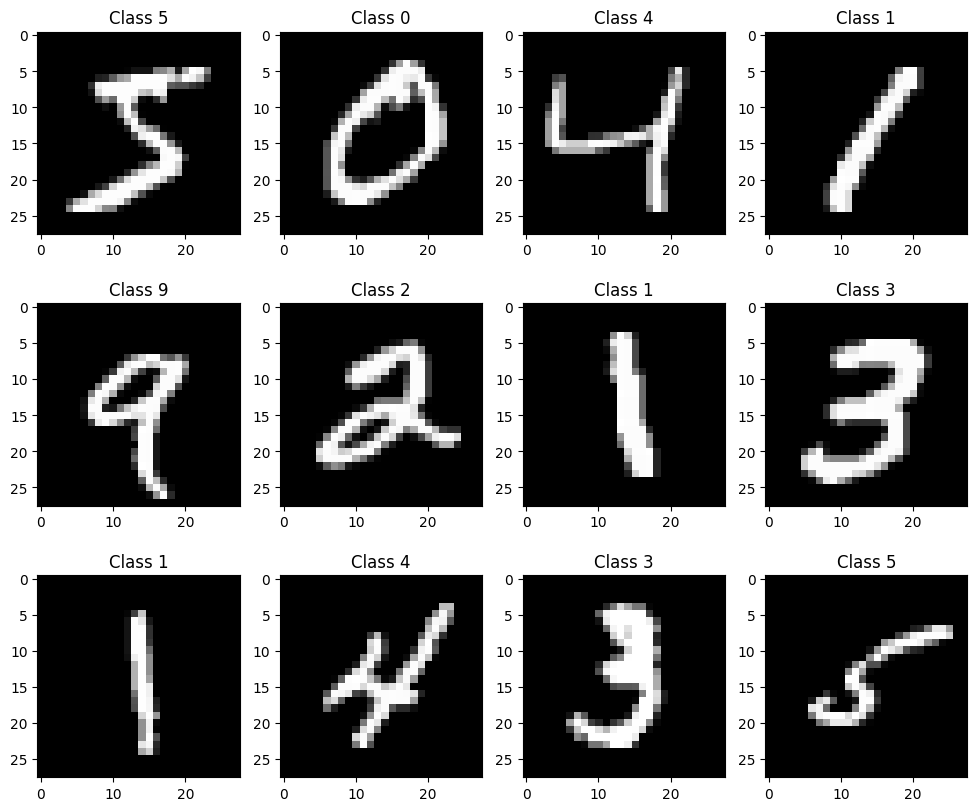

In [6]:
plt.figure(figsize=(12,10))

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[i]}")

# <font color=blue> Build the CNN Model</font>

## <font color=green>Pre-process the data:</font>
__1. Reshape $X$ and $Y$ to $(m, 28, 28, 1)$, where $m=$ # of samples in the dataset__

__2. Normalize the pixels for each image.__  

__3. Convert the output labels (y_train and y_test) to categorical data.__

In [7]:
m = X_train.shape[0]
test = X_test.shape[0]
print(f'The number of samples is {m}')

X_train = X_train.reshape(m, 28, 28, 1)
X_test = X_test.reshape(test, 28, 28, 1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(f'Train: {X_train.shape}')
print(f'Test: {X_test.shape}')

The number of samples is 60000
Train: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)


### Normalize the pixels

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Convert the output labels (y_train and y_test) to categorical data

In [9]:
num_classes = 10

Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train[0:5]

array([[5],
       [0],
       [4],
       [1],
       [9]], dtype=uint8)

In [11]:
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
Y_train.shape

(60000, 10)

In [13]:
y_train.shape

(60000, 1)

## <font color=green>Define the CNN model</font>

__Use CONV, POOL and FC layers to construct your CNN model. You will train and test the model after this step.__

In [102]:
# initialize the model
model = Sequential()

# THE CONVOLUTIONAL LAYERS

# first layer
model.add(
    Conv2D(filters=16, kernel_size=(2, 2), input_shape=(28, 28, 1), activation='relu', padding='same')
)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# output image size: (14, 14, 16)

# second layer
model.add(
    Conv2D(filters=32, kernel_size=(2, 2), activation='relu', padding='same')
)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# output image size: (7, 7, 32)

# third layer
model.add(
    Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding="same")
)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# output image size: (3, 3, 64)

# fourth layer
model.add(
    Conv2D(filters=128, kernel_size=(2, 2), activation='relu', padding='same')
)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# output image size: (1, 1, 128)

# FLATTEN
model.add(Flatten())

# THE FULLY CONNECTED LAYERS

# first fully connected layer
model.add(Dense(units=784, activation='relu'))

# second fully connected layer
model.add(Dense(units=392, activation='relu'))

# third fully connected layer
model.add(Dense(units=128, activation='relu'))

# final layer
model.add(Dense(units=num_classes, activation='softmax'))

### Print the model summary that shows the output shape and # of parameters for each layer.

In [104]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 7, 7, 64)          8256      
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 3, 3, 64)        

## <font color=green>Train the CNN Model</font>

In [105]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [127]:
# training
history = model.fit(X_train, Y_train, epochs=30, verbose=1, batch_size=512, validation_split=0.20)

Epoch 1/30
94/94 [==============================] - 2s 17ms/step - loss: 0.0313 - accuracy: 0.9916 - val_loss: 0.0563 - val_accuracy: 0.9836
Epoch 2/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0450 - val_accuracy: 0.9896
Epoch 3/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0594 - val_accuracy: 0.9866
Epoch 4/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0542 - val_accuracy: 0.9901
Epoch 5/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0499 - val_accuracy: 0.9899
Epoch 6/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0481 - val_accuracy: 0.9901
Epoch 7/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0507 - val_accuracy: 0.9886
Epoch 8/30
94

### Compare Loss and Accuracy Performance for train and validation data

#### Plot the loss data, for both train and validation data

In [128]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [129]:
J = history.history['loss']  # training loss
J_val = history.history['val_loss'] # validation loss

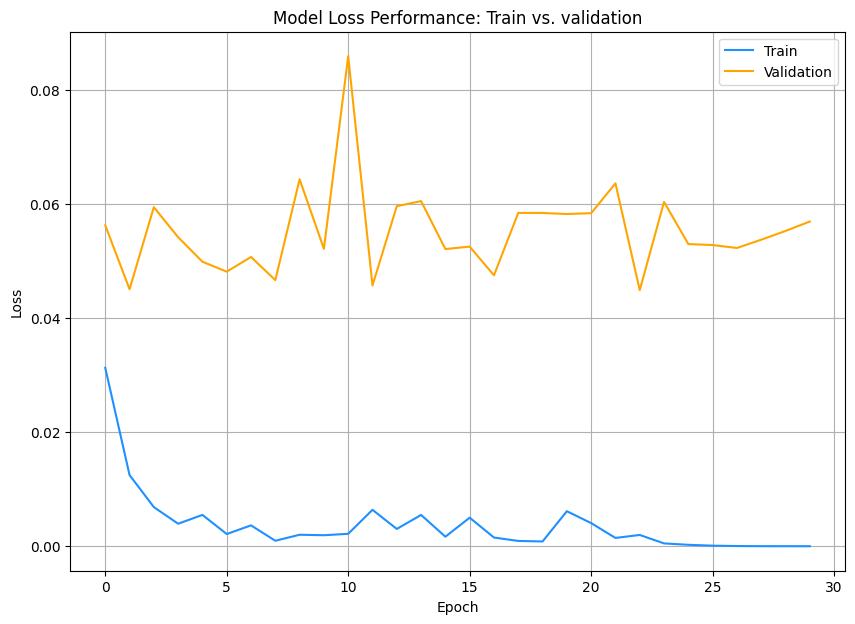

In [130]:
plt.figure(figsize=(10,7))

plt.title('Model Loss Performance: Train vs. validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

#### Plot the accuracy data, for both train and validation data

In [131]:
accu = history.history['accuracy']  # training accuracy
accu_val = history.history['val_accuracy'] # validation accuracy

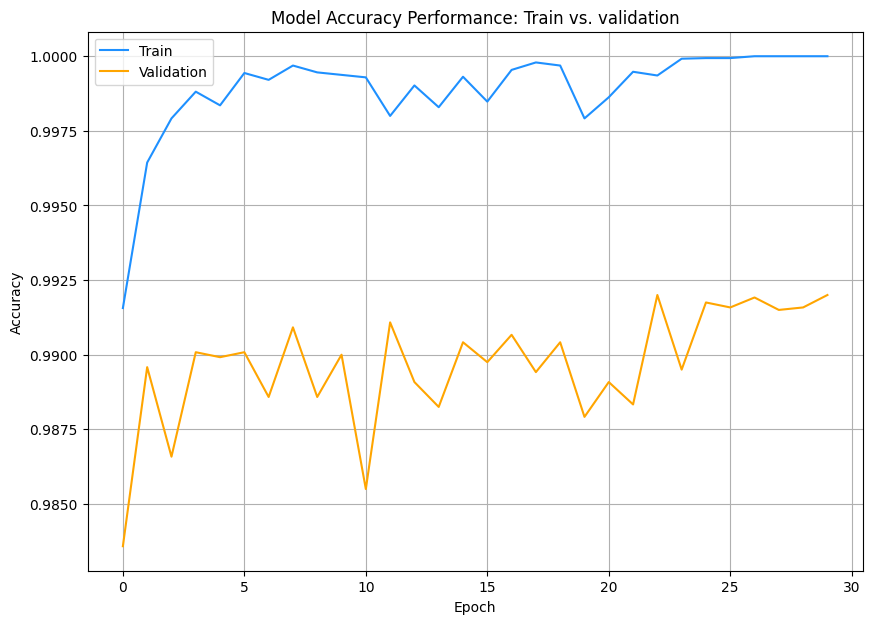

In [132]:
plt.figure(figsize=(10,7))

plt.title('Model Accuracy Performance: Train vs. validation')
plt.plot(accu, color='DodgerBlue', label='Train')
plt.plot(accu_val, color='orange', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

## <font color=green>Test the CNN Model</font>

In [133]:
score = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0596 - accuracy: 0.9909


### Print the final loss and accuracy of the test data

In [139]:
J_test = score[0]
test_accuracy = score[1]

print(f'The final loss on test data is {J_test:.4f}')
print(f'The accuracy on test data is {(test_accuracy * 100):.2f}%')

The final loss on test data is 0.0596
The accuracy on test data is 99.09%


### Save the CNN model parameters

In [140]:
model.save('MNIST_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## <font color=green>Conclusion</font>

### You will add remarks on:
__1. Number of parameters for the three models: MLP, baseline CNN, and your CNN__

__2. Performance (accuracy) comparison__

__3. Anything else you tried and observed while traing the model__

### Question 1
Number of parameters in MLP: 669,706 \\
Number of parameters in baseline CNN: 542,230 \\
Number of paramters in my CNN: 503762 \\
As the number of convolutional layers increase, the number of trainable parameters seem to be going down.

### Question 2
Testing accuracy for MLP: 97.35\% \\
Testing accuracy for baseline CNN: 95.44\% \\
Testing accuracy for my CNN: 99.09\% \\
From the testing accuracy, it seems like that the number of fully connected layers along with the convolutional layers play an essential part in the accuracy. The MLP had 3 FC layers, whereas the baseline CNN had only 2 FC layers and 1 Conv layer. My model has 4 FC layers and 4 Conv layers, which means that it's more deep than the other too models, hence, giving a better performance. Furthermore, I've used more filters in the convolutional layers, which means that relatively more higher level features are being extracted in this model.

### Question 3
I tried to adjust the validation ratio to and the batch size to increase the accuracy. Validation didn't really result in a huge change, but increasing the batch size gave a rapid boost to the time taken per epoch as well because increasing batch size means decreasing the number of batches, or the number of steps taken in each epoch.

## <center><font color=maroon>Remember to turn in both the notebook and the pdf version.</font></center>